# **WINE QUALITY PREDICTION**

##Importing the dataset

In [ ]:
## obtaining the requi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("drive/MyDrive/WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# Data Preprocessing



In [ ]:
# Checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [ ]:
df.shape

(1143, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
df['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [ ]:
# Dropping unnecessary columns
df.drop(columns=['Id'],inplace=True)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Exploratory Data Analysis

##**Correlation Matrix**

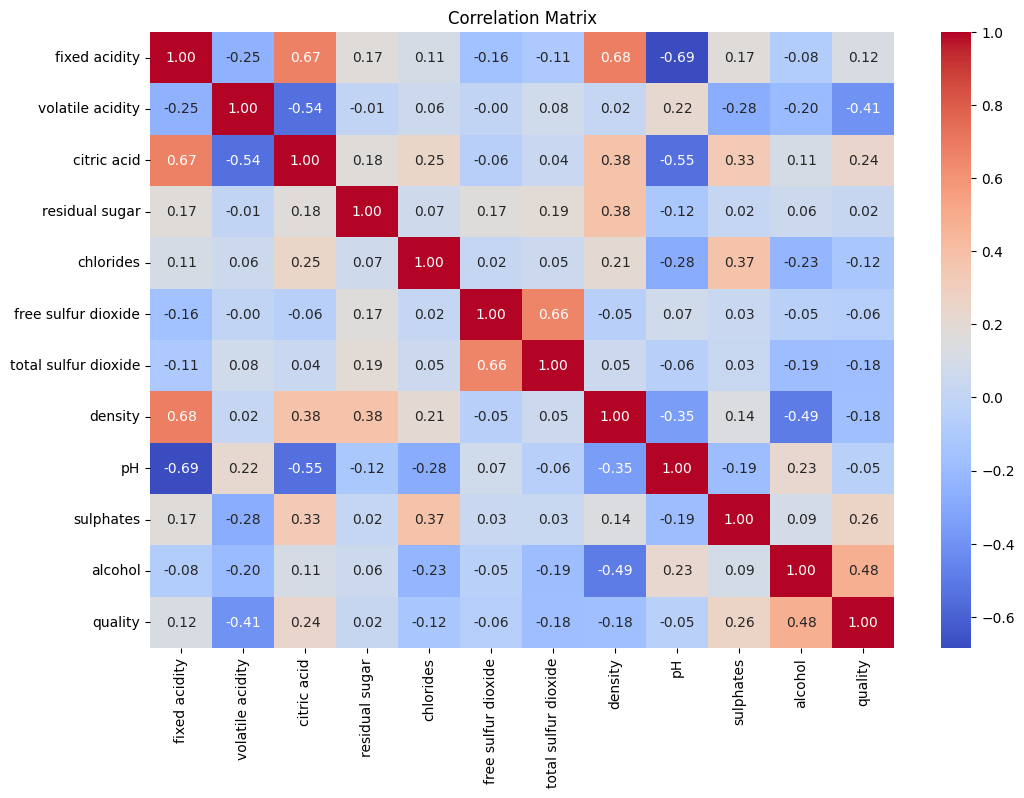

In [ ]:

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

##**Different Histplots**

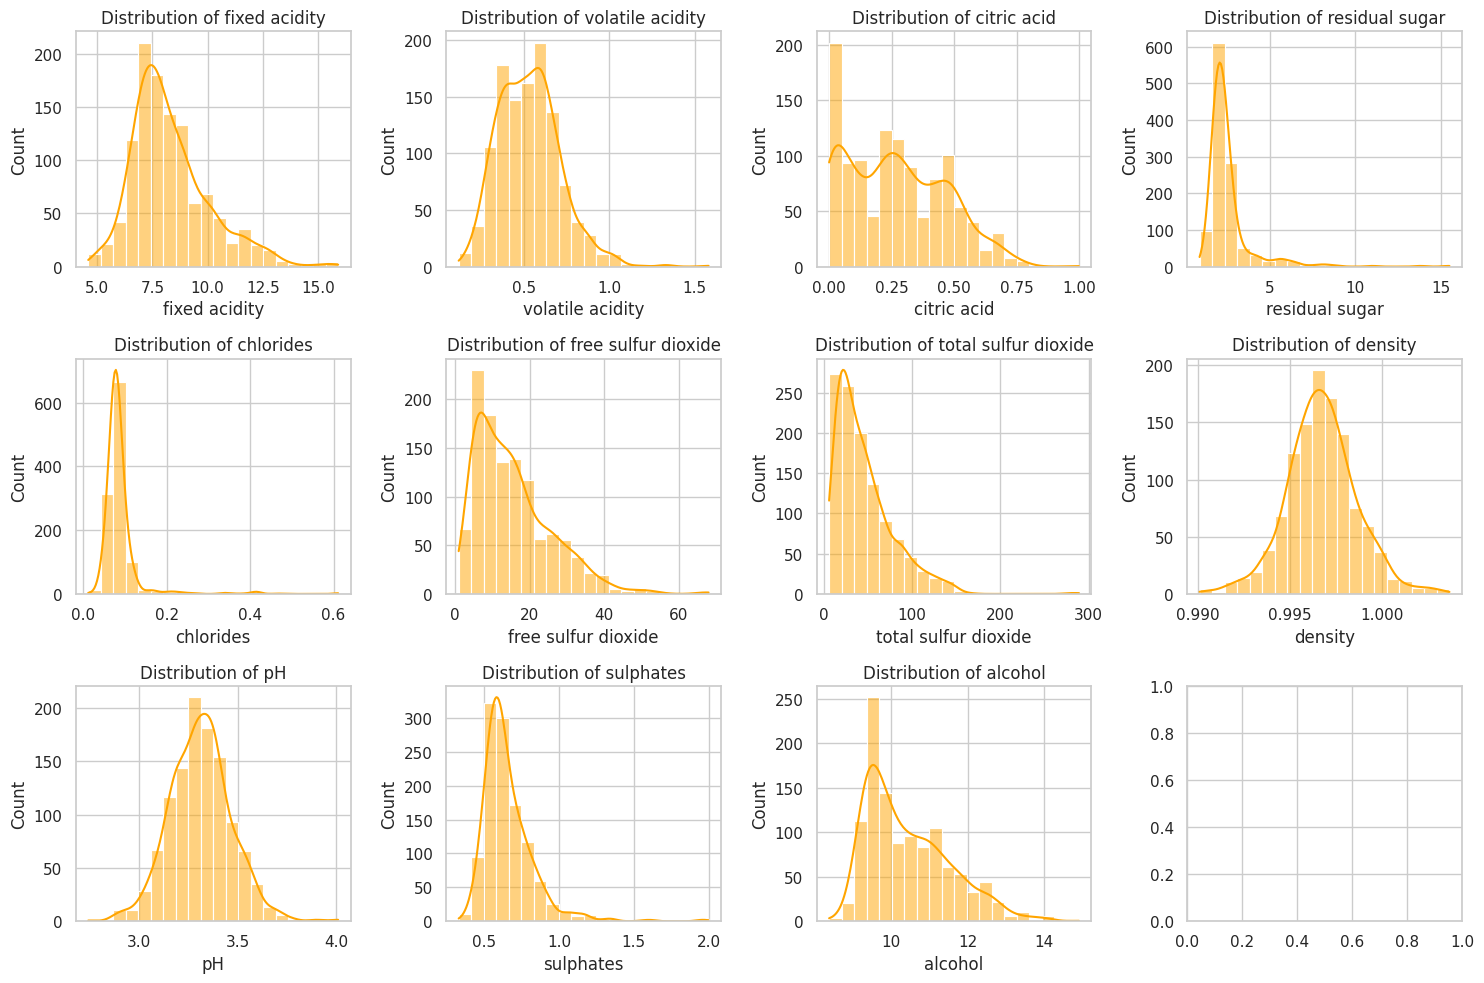

In [ ]:
sns.set(style="whitegrid")
fig, axes= plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

axes = axes.flatten()

numeric_columns = df.select_dtypes(include=['float64']).columns

for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], ax=axes[i], kde=True, bins=20, color='orange')
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

##**Distribution of Fixed Acidity**

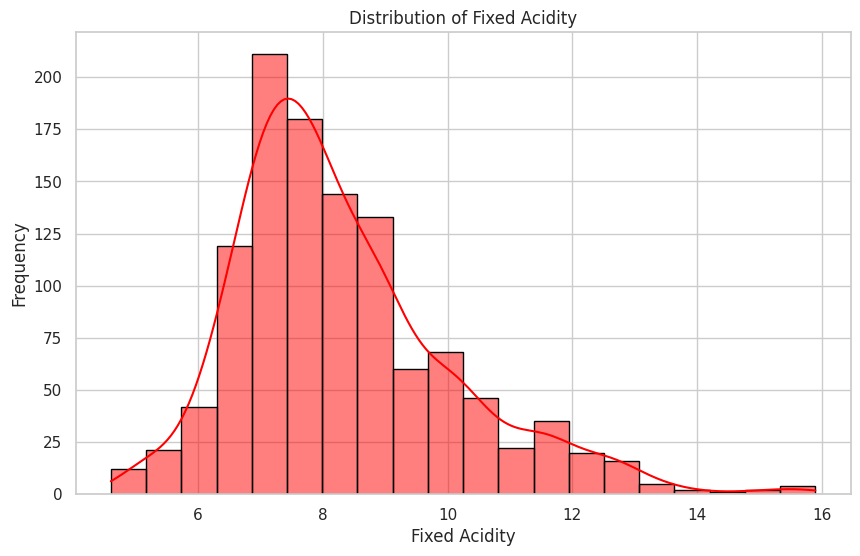

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['fixed acidity'], bins=20, kde=True, color='red', edgecolor='black')
plt.title('Distribution of Fixed Acidity')
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.show()

##**Scatter Plots for different features**

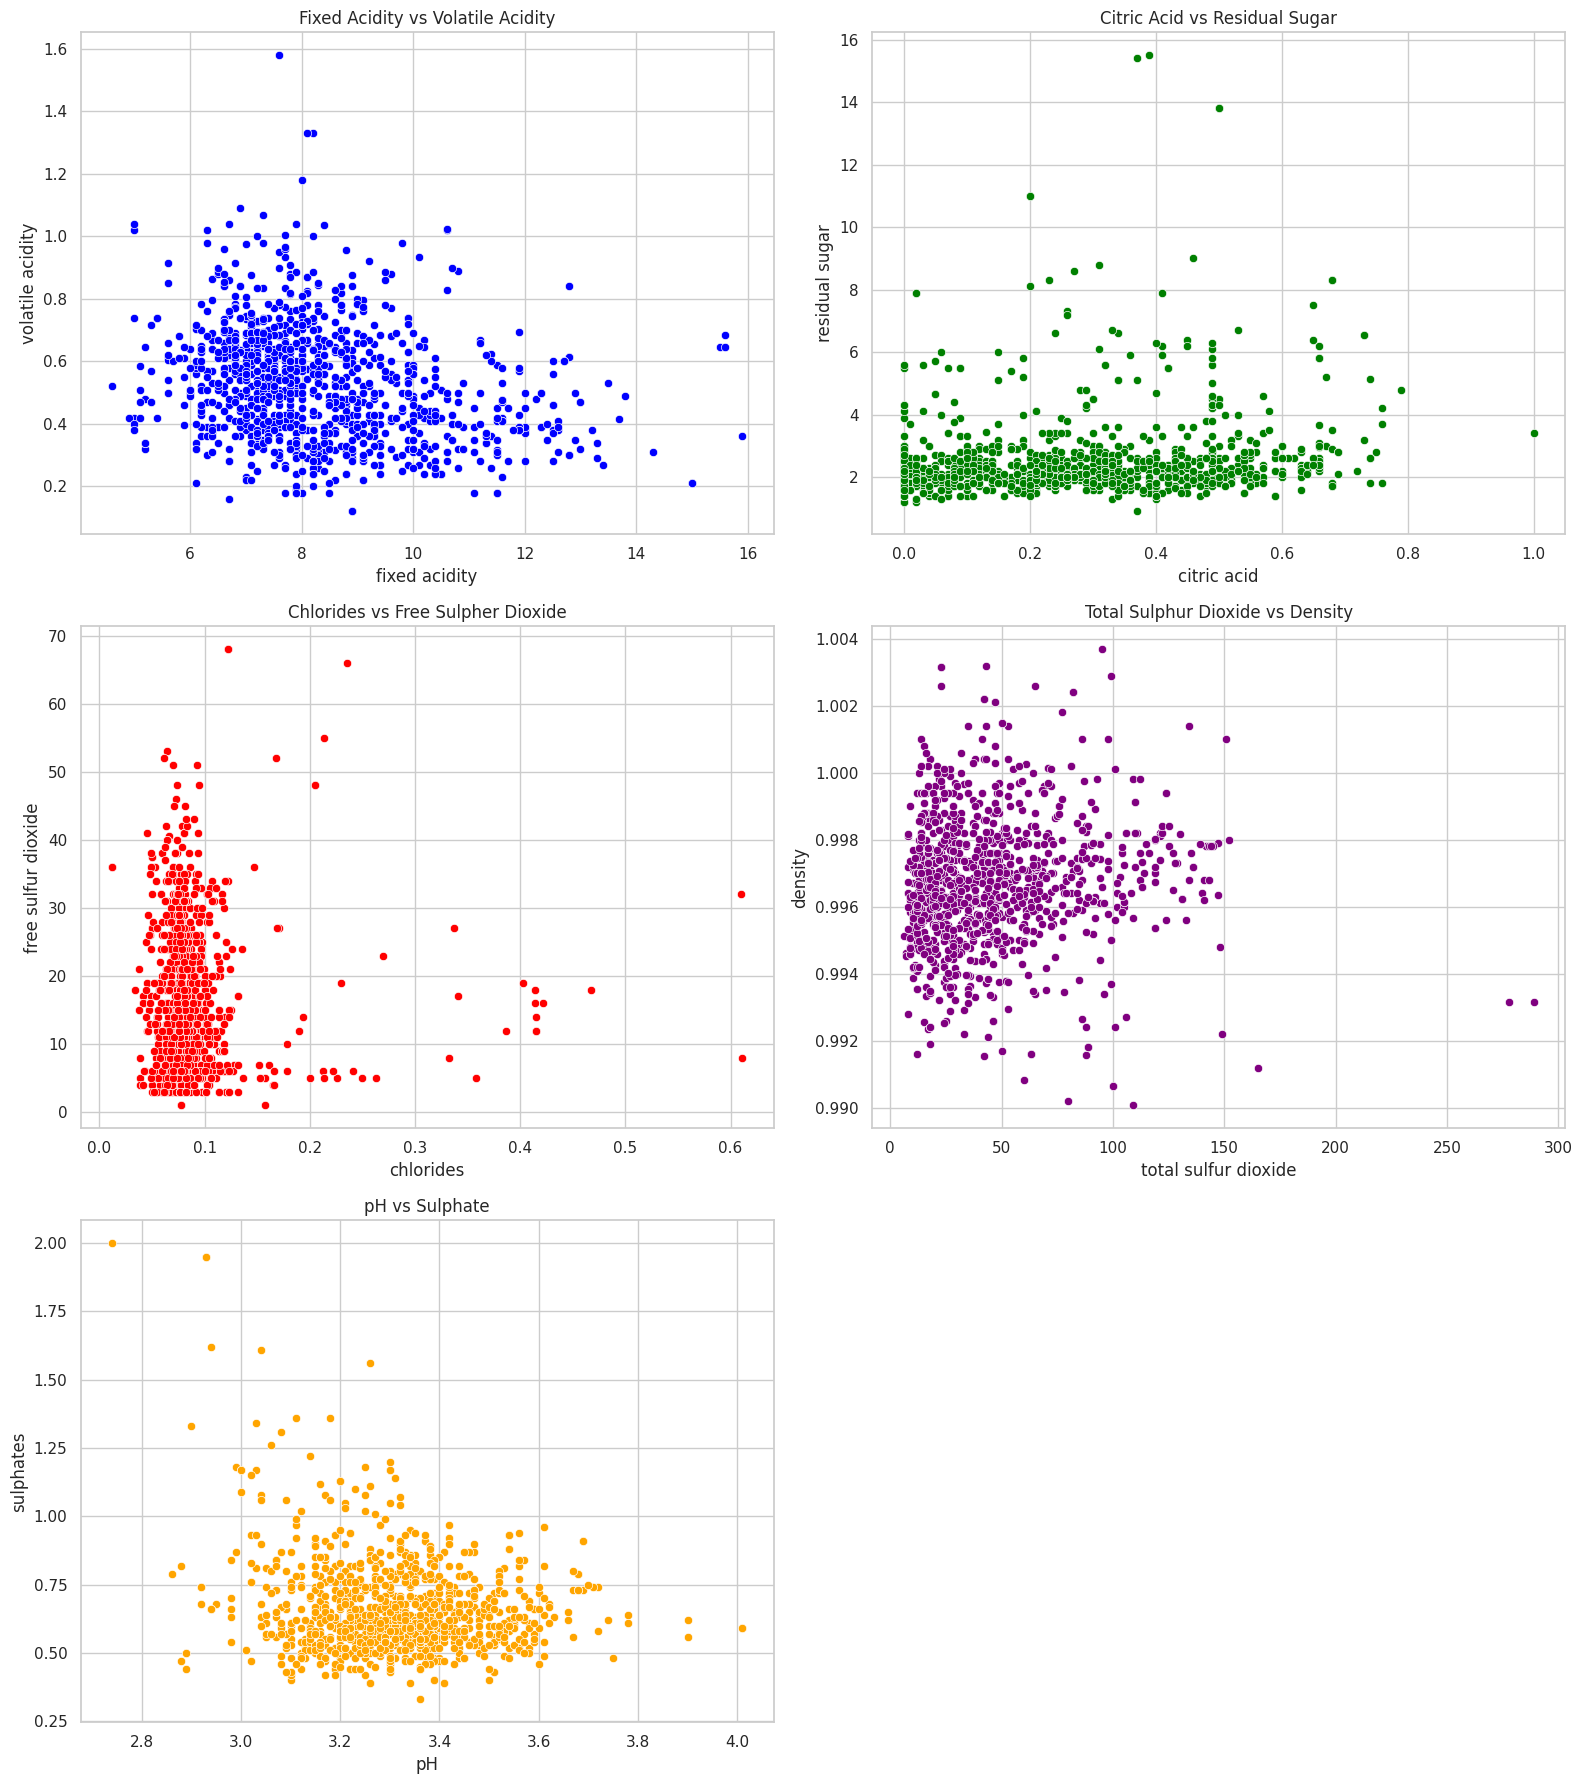

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

sns.scatterplot(x='fixed acidity', y='volatile acidity', data=df, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Fixed Acidity vs Volatile Acidity')

sns.scatterplot(x='citric acid', y='residual sugar', data=df, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Citric Acid vs Residual Sugar')

sns.scatterplot(x='chlorides', y='free sulfur dioxide', data=df, color='red', ax=axes[1, 0])
axes[1, 0].set_title('Chlorides vs Free Sulpher Dioxide')

sns.scatterplot(x='total sulfur dioxide', y='density', data=df, color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Total Sulphur Dioxide vs Density')

sns.scatterplot(x='pH', y='sulphates', data=df, color='orange', ax=axes[2, 0])
axes[2, 0].set_title('pH vs Sulphate')

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

# Data Splitting

In [ ]:
## Splitting the Dataset into X and y for model training
X=df.drop(columns=['quality'],axis=1)
y=df['quality']

In [ ]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [ ]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

##**Feature Extraction**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
## Using SelectKBest algorithm with scoring function as f_regression
k = 5
selector = SelectKBest(score_func=f_regression, k=k)
selector.fit(X_train, y_train)
selected_indices = selector.get_support(indices=True)
selected_feature_names = X_train.columns[selected_indices]

print("Names of selected features:", selected_feature_names)

Names of selected features: Index(['volatile acidity', 'citric acid', 'density', 'sulphates', 'alcohol'], dtype='object')


In [ ]:
df2=pd.read_csv("drive/MyDrive/WineQT.csv")
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# Obtaining new Dataset with important features and splitting

In [ ]:
df2.drop(columns=['Id'],inplace=True)


In [ ]:
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [ ]:
X_df=df2.drop(columns=['fixed acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','pH','quality'])
y_df=df2['quality']

In [ ]:
X_df

,volatile acidity,citric acid,density,sulphates,alcohol
0,0.700,0.00,0.99780,0.56,9.4
1,0.880,0.00,0.99680,0.68,9.8
2,0.760,0.04,0.99700,0.65,9.8
3,0.280,0.56,0.99800,0.58,9.8
4,0.700,0.00,0.99780,0.56,9.4
...,...,...,...,...,...
1138,0.510,0.13,0.99574,0.75,11.0
1139,0.620,0.08,0.99651,0.82,9.5
1140,0.600,0.08,0.99490,0.58,10.5
1141,0.550,0.10,0.99512,0.76,11.2


In [ ]:
y_df

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [ ]:
M_train,M_test,n_train,n_test=train_test_split(X_df,y_df,test_size=0.25,random_state=42)

In [ ]:
M_train

,volatile acidity,citric acid,density,sulphates,alcohol
970,0.740,0.08,0.99576,0.50,9.8
72,0.575,0.22,0.99670,0.51,9.2
665,0.430,0.40,0.99834,0.64,10.0
584,0.500,0.55,1.00012,0.68,10.9
649,0.360,0.32,0.99640,0.72,11.0
...,...,...,...,...,...
1044,1.040,0.08,0.99648,0.57,11.0
1095,0.390,0.30,0.99717,0.61,9.0
1130,0.350,0.33,0.99470,0.60,11.9
860,0.570,0.31,0.99677,0.69,9.5


In [ ]:
M_train.shape

(857, 5)

In [ ]:
M_test.shape

(286, 5)

# Training using ML models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def train_regression_models(X_train, y_train, X_test, y_test, model_names, models):
    trained_models = {}
    evaluation_metrics = {}

    for model_name in model_names:
        model = models[model_name]
        model.fit(X_train, y_train)
        trained_models[model_name] = model

        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        evaluation_metrics[model_name] = {'MSE': mse, 'R-squared': r2}

    return trained_models, evaluation_metrics



In [ ]:
model_names = ['Linear Regression', 'Random Forest Regression', 'Gradient Boosting Regression']
models = {
   'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42)
 }
trained_models, evaluation_metrics = train_regression_models(M_train, n_train, M_test, n_test, model_names, models)
print(evaluation_metrics)


{'Linear Regression': {'MSE': 0.375861692521844, 'R-squared': 0.3423043533743342}, 'Random Forest Regression': {'MSE': 0.3375258741258741, 'R-squared': 0.40938567975184514}, 'Gradient Boosting Regression': {'MSE': 0.3586581599457715, 'R-squared': 0.37240768315489725}}


# Final Results

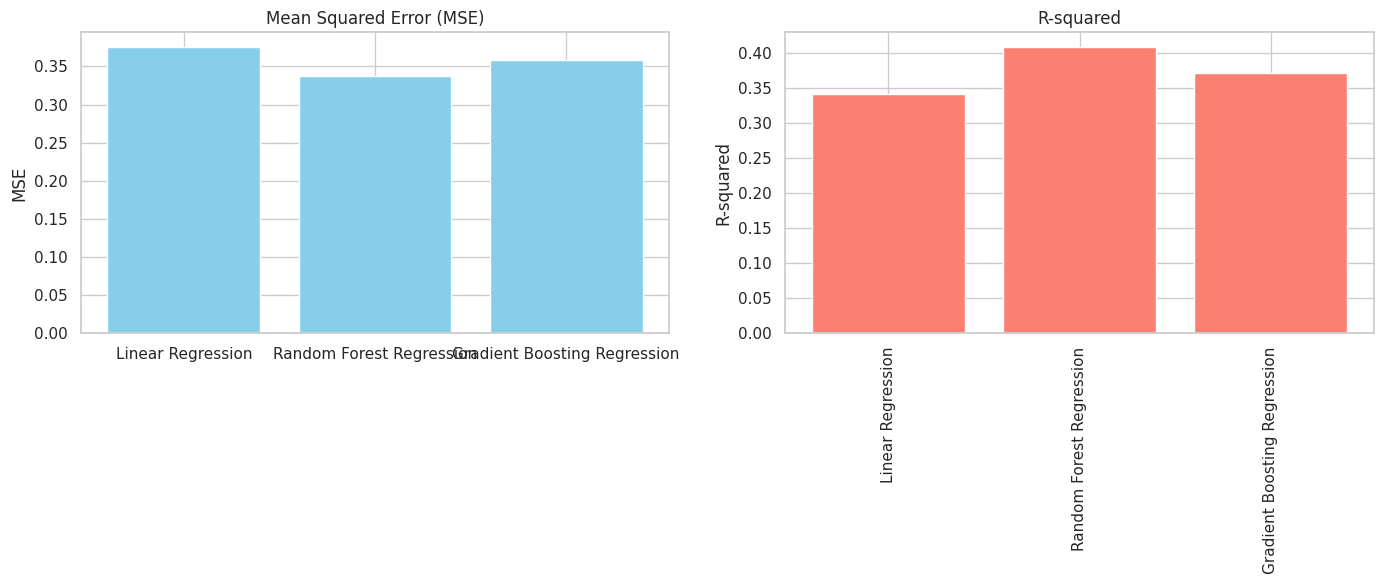

In [ ]:
def plot_evaluation_metrics(evaluation_metrics):
    model_names = list(evaluation_metrics.keys())
    mse_values = [metrics['MSE'] for metrics in evaluation_metrics.values()]
    r_squared_values = [metrics['R-squared'] for metrics in evaluation_metrics.values()]

    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    ax[0].bar(model_names, mse_values, color='skyblue')
    ax[0].set_title('Mean Squared Error (MSE)')
    ax[0].set_ylabel('MSE')
    plt.xticks(rotation='vertical')
    ax[1].bar(model_names, r_squared_values, color='salmon')
    ax[1].set_title('R-squared')
    ax[1].set_ylabel('R-squared')

    plt.tight_layout()
    plt.xticks(rotation='vertical')
    plt.show()

plot_evaluation_metrics(evaluation_metrics)

# Predictions

In [ ]:
model=RandomForestRegressor()

In [ ]:
model.fit(M_train,n_train)

RandomForestRegressor()

In [ ]:
n_pred = model.predict(M_test)
mse = mean_squared_error(n_test, n_pred)

In [ ]:
print(mse)

0.3369293706293706


##**Plots for checking accuracy of Predictions**

In [ ]:
def plot_regression_results(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, y_test, alpha=0.5)
    plt.plot([min(y_pred), max(y_pred)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Actual vs. Predicted')
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs. Predicted')
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.hist(y_test - y_pred, bins=20, edgecolor='k')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Histogram of Residuals')
    plt.show()

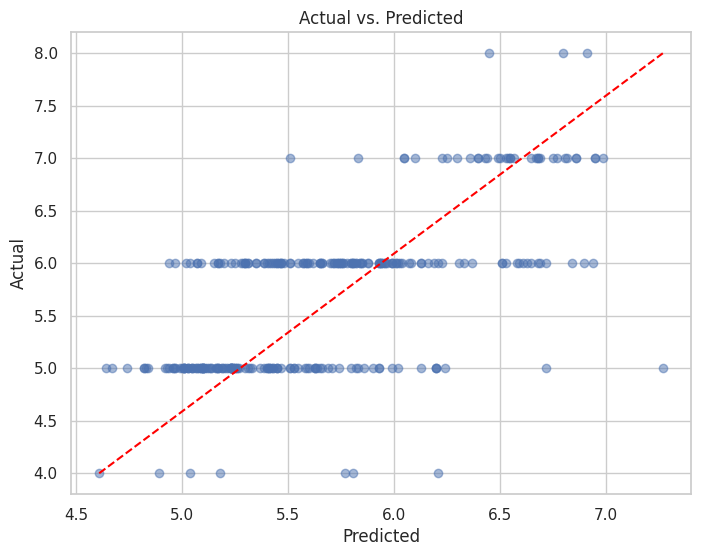

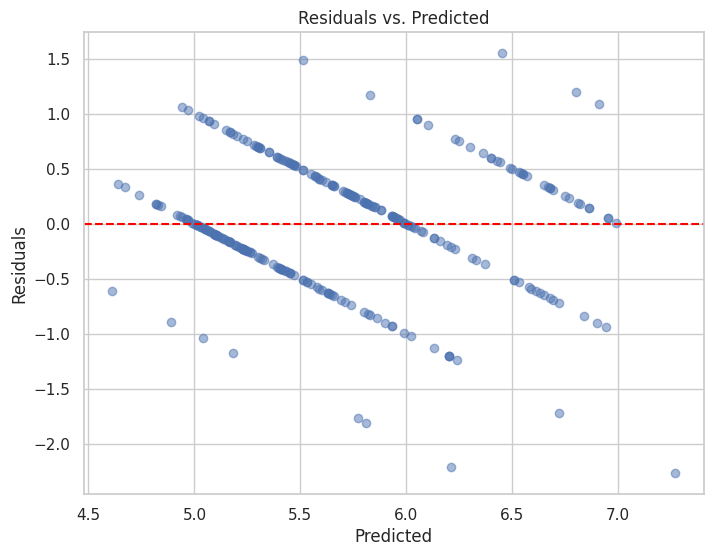

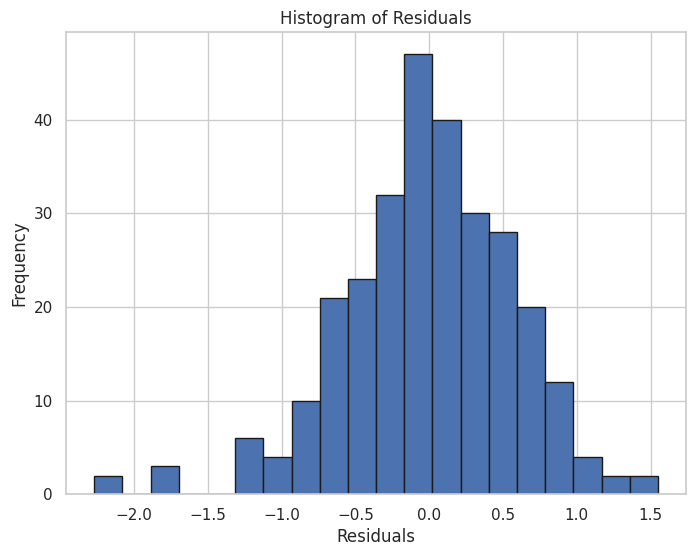

In [ ]:
plot_regression_results(n_test, n_pred)

##**Checking with random inputs from test Set**

In [ ]:
random_indices = np.random.choice(M_test.shape[0], size=5, replace=False)

random_samples = M_test.iloc[random_indices]

predicted_quality = model.predict(random_samples)

print("Predicted wine quality for random samples:")
for i in range(len(random_indices)):
    print(f"Sample {random_indices[i]}: {predicted_quality[i]}")

Predicted wine quality for random samples:
Sample 21: 5.85
Sample 141: 5.35
Sample 169: 4.97
Sample 4: 5.93
Sample 220: 5.82


In [ ]:
df.iloc[21]

fixed acidity            7.8000
volatile acidity         0.6450
citric acid              0.0000
residual sugar           2.0000
chlorides                0.0820
free sulfur dioxide      8.0000
total sulfur dioxide    16.0000
density                  0.9964
pH                       3.3800
sulphates                0.5900
alcohol                  9.8000
quality                  6.0000
Name: 21, dtype: float64